## Sri Handini/20110019/S1SD-01-A

[link GC](https://colab.research.google.com/drive/1acBYEGO0wccWNKSzvAOfrLNzGgodJ6X_?usp=sharing)

Data yang digunakan adalah data hasil panen
sumber data : BPS Banyumas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset =pd.read_excel("/content/drive/My Drive/anreg/data hasil panen.xlsx")
dataset.head(5)

,Kecamatan,Luas Panen,Produksi
0,Lumbir,2090,11913
1,Wangon,3036,17305
2,Jatilawang,3221,18360
3,Rawalo,2775,15818
4,Kebasen,1836,10447


In [4]:
dataset.shape

(27, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Kecamatan   27 non-null     object
 1   Luas Panen  27 non-null     int64 
 2   Produksi    27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [6]:
dataset.describe()

,Luas Panen,Produksi
count,27.000000,27.000000
mean,2488.000000,14171.703704
std,1275.962141,7268.809223
min,274.000000,1559.000000
25%,1772.000000,10083.000000
50%,2708.000000,15436.000000
75%,3286.500000,18717.000000
max,4912.000000,27998.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


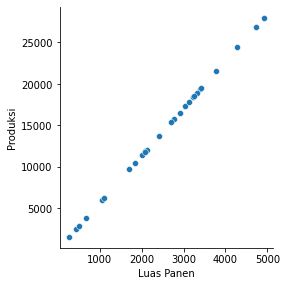

In [7]:
import seaborn as sns

sns.pairplot(dataset, x_vars=['Luas Panen'],
y_vars='Produksi', size=4, aspect=1, kind='scatter')
plt.show()

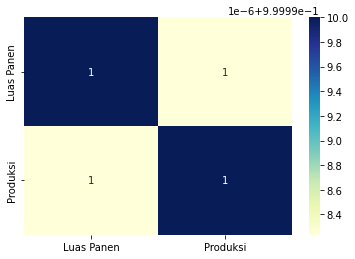

In [8]:
 # Visualizing the data using heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

#Data Training dan Testing

In [9]:
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[11913]
 [17305]
 [18360]
 [15818]
 [10447]
 [21523]
 [17827]
 [19391]
 [ 6048]
 [ 9719]
 [ 6264]
 [16547]
 [11411]
 [19460]
 [12061]
 [26902]
 [27998]
 [11824]
 [15436]
 [13702]
 [24430]
 [18941]
 [18493]
 [ 2519]
 [ 2856]
 [ 1559]
 [ 3882]]
[11913 17305 18360 15818 10447 21523 17827 19391  6048  9719  6264 16547
 11411 19460 12061 26902 27998 11824 15436 13702 24430 18941 18493  2519
  2856  1559  3882]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [13]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Printing the parameters
lr.params

array([1.36424205e-12, 1.00000000e+00])